# (Bikes Data Exploration)
## by (Jeong ha, Park)

## Investigation Overview

> TI'm most interested in the following with approximately 405,000 bikes in New York:
- When are most trips taken in terms of time of day, day of the week, or month of the year?
- How long does the average trip take?
- Does the above depend on if a user is a subscriber or customer?

## Dataset Overview

> This document explores datasets containing time, station and other attribures for approximately 405,000 bikes in New York.
- There are 404,947 bikes in New York with features.
(New York : Trip_Duration, Start_Time, End_Time, Start_Station, End_Station, Bke_ID, User_Type,  Birth_Year, Gender, Start_Hour, End_Hour)

- Type of Trip_Duration variable is originally int and its statistic is expressed with eponential type. So I made original Trip_Duration Trip_Duration(s): seconds. Also, I have a new column 'Trip_Duration(m)':minutes with float type.
And the variables User_Type, Gender, Trip_Route and Passholder are categorical types with the following.


- Gender : Female, Male, Unknown <br>
- User_Type : Subscriber, Customer <br>
- Trip_Rout : One Way, Round Trip <br>
- Passholder : Walk-up, One Day Pass ,Monthly Pass, Annual Pass, Flex Pass ,Testing <br>
- Bike_Type : Standard, Electric, Smart <br>


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
df_NY = pd.read_csv('2019_citibike_NY.csv')
new_header = df_NY.iloc[0]
df_NY = df_NY[1:]
df_NY.columns = new_header
df_NY.reset_index()
df_NY.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
1,201,2019-01-01 03:09:09.7110,2019-01-01 03:12:30.8790,3183,Exchange Place,40.7162469,-74.0334588,3214,Essex Light Rail,40.7127742,-74.0364857,29612,Subscriber,1993,1
2,505,2019-01-01 05:18:00.1060,2019-01-01 05:26:25.9050,3183,Exchange Place,40.7162469,-74.0334588,3638,Washington St,40.7242941,-74.0354826,29213,Subscriber,1972,2
3,756,2019-01-01 10:36:33.3400,2019-01-01 10:49:10.2600,3183,Exchange Place,40.7162469,-74.0334588,3192,Liberty Light Rail,40.7112423,-74.0557013,26164,Subscriber,1985,1
4,1575,2019-01-01 12:43:38.6430,2019-01-01 13:09:54.5280,3183,Exchange Place,40.7162469,-74.0334588,3638,Washington St,40.7242941,-74.0354826,29672,Customer,1969,0
5,1566,2019-01-01 12:43:39.6010,2019-01-01 13:09:46.5100,3183,Exchange Place,40.7162469,-74.0334588,3638,Washington St,40.7242941,-74.0354826,29522,Customer,1969,0


In [6]:
# Copy the datasets
df_2019_NY_clean = df_NY.copy()

In [7]:
# drop the unnecessary columns in df_2019_NY_clean, df_2019_LA_clean
df_2019_NY_clean.drop('start station latitude', axis = 1, inplace = True)
df_2019_NY_clean.drop('start station longitude', axis = 1, inplace = True)
df_2019_NY_clean.drop('end station latitude', axis = 1, inplace = True)
df_2019_NY_clean.drop('end station longitude', axis = 1, inplace = True)
df_2019_NY_clean.drop('start station id', axis = 1, inplace = True)
df_2019_NY_clean.drop('end station id', axis = 1, inplace = True)

#   Change starttime, stoptime, birth year into the datetype in df_2019_NY_clean, df_2019_LA_clean
df_2019_NY_clean['starttime'] = pd.to_datetime(df_2019_NY_clean['starttime'])
df_2019_NY_clean['stoptime'] = pd.to_datetime(df_2019_NY_clean['stoptime'])
df_2019_NY_clean['birth year'] = pd.to_datetime(df_2019_NY_clean['birth year']).dt.strftime('%Y')
df_2019_NY_clean['tripduration'] = df_2019_NY_clean['tripduration'].astype(int)

# change columns name in NY, LA.
df_2019_NY_clean.rename(columns = { 'tripduration': 'Trip_Duration'
                                 ,'starttime':'Start_Time', 'stoptime':'End_Time'
                                 , 'start station name':'Start_Station'
                                 , 'end station name':'End_Station'
                                 , 'bikeid':'Bke_ID', 'usertype':'User_Type'
                                 , 'birth year':'Birth_Year', 'gender':'Gender'}, inplace = True)
df_2019_NY_clean.head(0)

,Trip_Duration,Start_Time,End_Time,Start_Station,End_Station,Bke_ID,User_Type,Birth_Year,Gender


In [8]:
# Gender (Zero=unknown; 1=male; 2=female)
df_2019_NY_clean['Gender'] = df_2019_NY_clean['Gender'].apply(lambda x: 'Male' if x == '1' else ('Female' if x=='2' else 'Unknown'))    

df_2019_NY_clean.rename(columns = {'Trip_Duration': 'Trip_Duration(s)'}, inplace =True)

df_2019_NY_clean['Trip_Duration(m)'] = df_2019_NY_clean['Trip_Duration(s)'].apply(lambda x: round(x/60, 2))
df_2019_NY_clean['Trip_Duration(m)'].describe()

count    404947.000000
mean         12.097376
std         163.087298
min           1.020000
25%           3.880000
50%           5.750000
75%           9.670000
max       42773.670000
Name: Trip_Duration(m), dtype: float64

In [9]:
# function to make the new column 'AM', "PM" , Hour,Week in df_2019_LA_clean, df_2019_NY_clean
def set_time(dataset):
    dataset["Start_Hour"] = dataset['Start_Time'].dt.hour
    dataset["Start_Noon"] = dataset["Start_Hour"].apply(lambda x :'PM' if x >= 12 else 'AM')
    dataset["Start_Hour"] = dataset["Start_Hour"].astype(str)
    dataset["End_Hour"] = dataset['End_Time'].dt.hour
    dataset["End_Noon"] = dataset["End_Hour"].apply(lambda x :'PM' if x >= 12 else 'AM')   
    dataset["End_Hour"] = dataset["End_Hour"].astype(str)
    
    dataset["Start_Month"] = dataset['Start_Time'].dt.month   
    dataset["Start_Month"] = dataset["Start_Month"].astype(str)
    dataset["Start_Weekday"] = dataset['Start_Time'].dt.day_name()
    #dataset["Start_Weekday"] = dataset["Start_Weekday"][:3]
    #dataset["Start_Weekday"] = dataset['Start_Time'].dt.weekday
    
set_time(df_2019_NY_clean)

In [10]:
# change categoty type(user_type, gender in NY, 
# Monday is 1 and Sunday is 7


ordinal_NY_dict = {'Gender' : ['Female', 'Male','Unknown'],
                    'User_Type' : ['Subscriber', 'Customer'],
                  'Start_Hour': ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'],
                  'Start_Month': ['1','2','3','4','5','6','7','8','9','10','11','12'],
                  'Start_Weekday' : ['Sunday','Monday','Tuesday', 'Wednesday', 'Thursday','Friday','Saturday']}
for var in ordinal_NY_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_NY_dict[var])
    df_2019_NY_clean[var] = df_2019_NY_clean[var].astype(ordered_var)

In [11]:
bikes_NY = df_2019_NY_clean.copy()

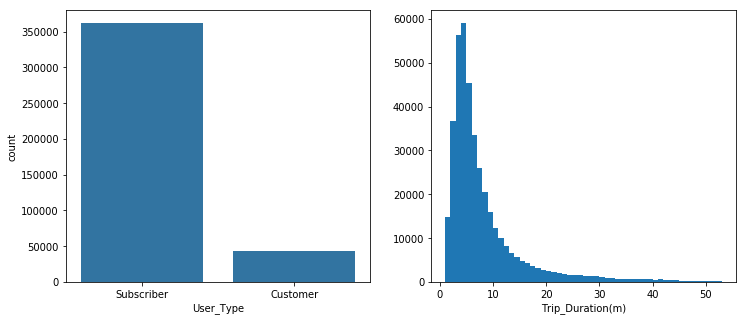

In [12]:
plt.figure(figsize = [12, 5])
base_color = sb.color_palette()[0]

# subplot 1: 
plt.subplot(1, 2, 1)
sb.countplot(data = bikes_NY, x = 'User_Type', color = base_color);

# subplot 2: 
ax = plt.subplot(1, 2, 2)

bins = np.arange(1, 52.2 + 1, 1)
plt.hist(data=bikes_NY, x = 'Trip_Duration(m)', bins = bins);
ax.set_xlabel('Trip_Duration(m)')

plt.show()

## (1) The number of people by User type and The distribution of trip duration

> The count of subscriber is much more than the count of customer in New Youk. It is almost 7 times. The people riding less than 52 minutes are 98.44% of the total. They are distributed in 10 minutes below.

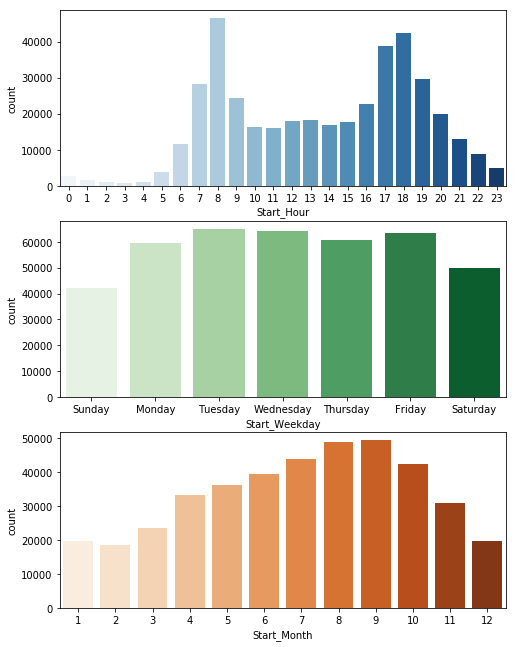

In [13]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [8, 11])

# subplot 1: hour
plt.subplot(3, 1, 1)
sb.countplot(data = bikes_NY, x = 'Start_Hour', palette = 'Blues');

# subplot 2: day of week
ax = plt.subplot(3, 1, 2)
sb.countplot(data = bikes_NY, x = 'Start_Weekday', palette = 'Greens');
#ax.legend(ncol = 3) # re-arrange legend to reduce overlapping

# subplot 3: month
ax = plt.subplot(3, 1, 3)
sb.countplot(data = bikes_NY, x = 'Start_Month', palette = 'Oranges')
#ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

## (2) The Frequency of the bikes' use in terms of hour, weekday, month

> The number of subscribers is much more than the number of customers and the people who are 98.44% almost used the bikes for about 10 minutes below in New York. By times, People usually ride on 7~8 am and on 17~19 pm by the time of day. And people prefer to ride on the days of week than the weekends. Also they ride between April and October by the month of the year.

In [15]:
value_first = bikes_NY['Trip_Duration(m)'].describe()[6] #9.67
bikes_NY_below9 = bikes_NY[bikes_NY['Trip_Duration(m)'] <= value_first]
bikes_NY_over9 = bikes_NY[bikes_NY['Trip_Duration(m)'] > value_first]

value_second = bikes_NY_over9['Trip_Duration(m)'].describe()[6]      #  24.620000
bikes_NY_below24 = bikes_NY[bikes_NY['Trip_Duration(m)'] <= value_second]
bikes_NY_over24 = bikes_NY[bikes_NY['Trip_Duration(m)'] > value_second]

value_third = bikes_NY_over24['Trip_Duration(m)'].describe()[6]  #52.13
bikes_NY_below52 = bikes_NY[bikes_NY['Trip_Duration(m)'] <= value_third]
bikes_NY_over52 = bikes_NY[bikes_NY['Trip_Duration(m)'] > value_third]

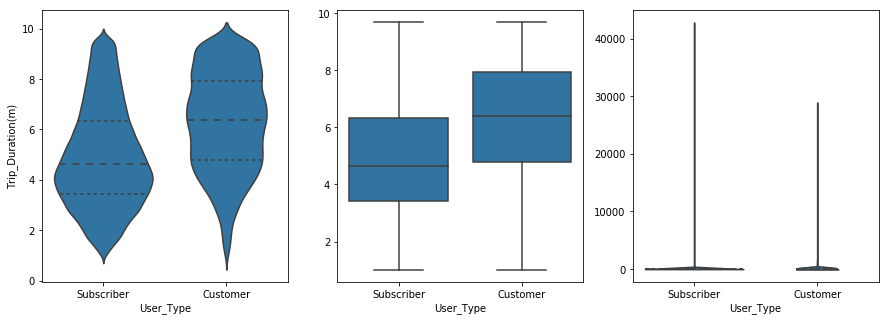

In [16]:
plt.figure(figsize = [15, 5])

# subplot 1: 
plt.subplot(1, 3, 1)
sb.violinplot(data=bikes_NY_below9, y= 'Trip_Duration(m)', x='User_Type', color= base_color, inner = 'quartile')

# subplot 2:
ax = plt.subplot(1, 3, 2)
sb.boxplot(data=bikes_NY_below9, y= 'Trip_Duration(m)', x='User_Type', color= base_color)
ax.set_ylabel('')

# subplot 3: 
ax = plt.subplot(1, 3, 3)
sb.violinplot(data=bikes_NY_over9, y= 'Trip_Duration(m)', x='User_Type', color= base_color, inner = 'quartile')
ax.set_ylabel('')
plt.show()

## (3) The Frequency of the bikes' use with 303,849 data which are 75%

>  The first and second plot : The 303,849 data which are 75% usually ride the bikes for about 5 minutes(4.72) on average(Total : 404,947). Longest ride is 9.67 minutes and Shortest time is 1.02 minutes. By user type, subscribers ride the bikes for about 5 minutes on average and customers rides for 6 minutes on average . Most of subscribers ride for about 5 minutes and most of customers ride for 5 ~ 8 minutes. It seems that customers ride longer than subscribers. 
>  The third plot : But It is difficult for  the 101,098 data(people) who are 75% over to analyze because it is distributed over a wide time period. Therefore, the statistics of data existing between 75% and 100% of the total data were re-analyzed and re-analyzed by user type based on 52 minutes.

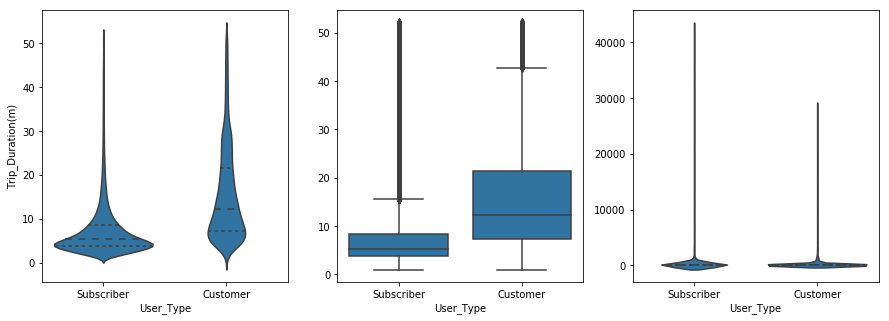

In [17]:
plt.figure(figsize = [15, 5])

# subplot 1: 
plt.subplot(1, 3, 1)
sb.violinplot(data=bikes_NY_below52, y= 'Trip_Duration(m)', x='User_Type', color= base_color, inner = 'quartile');

# subplot 2: 
ax = plt.subplot(1, 3, 2)
sb.boxplot(data=bikes_NY_below52, y= 'Trip_Duration(m)', x='User_Type', color= base_color);
ax.set_ylabel('')

# subplot 3: 
ax = plt.subplot(1, 3, 3)
sb.violinplot(data=bikes_NY_over52, y= 'Trip_Duration(m)', x='User_Type', color= base_color, inner = 'quartile')
ax.set_ylabel('')
plt.show()

## (4) The Frequency of the bikes' use with 398,636 data which are 98%

> The first and second plot : The people riding less than 52 minutes are 98.44% of the total 404,947. The subscribers of them usually ride for 5.67 minutes on average and the customers of them ride for 12 minutes on average. It seems that customers ride longer than subscribers. The third plot : But It is also difficult for  the 6311 data(people) who are 75% over to analyze because it is distributed over a wide time period. 

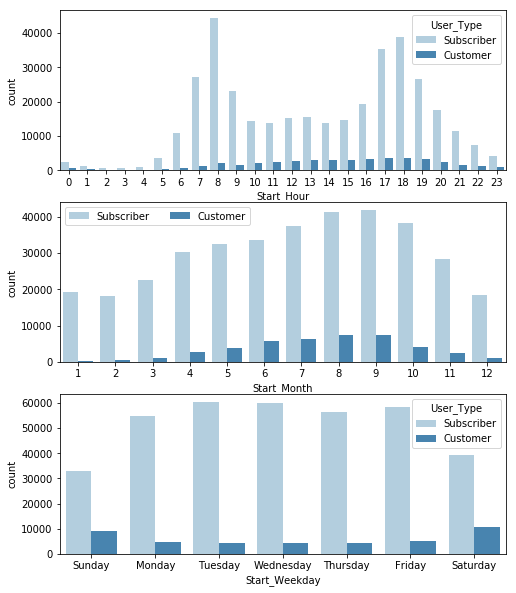

In [19]:
plt.figure(figsize = [8, 10])

# subplot 1: hour
plt.subplot(3, 1, 1)
sb.countplot(data = bikes_NY, x = 'Start_Hour', hue = 'User_Type', palette = 'Blues');

# subplot 2: day of week
ax = plt.subplot(3, 1, 2)
sb.countplot(data = bikes_NY, x = 'Start_Month', hue = 'User_Type', palette = 'Blues');
ax.legend(ncol = 3) # re-arrange legend to reduce overlapping

# subplot 3: month
ax = plt.subplot(3, 1, 3)
sb.countplot(data = bikes_NY, x = 'Start_Weekday', hue = 'User_Type', palette = 'Blues');

plt.show()

## (5) The Frequency in terms of hour, weekday, month by User type

> The trip duraion is closely related to the time, even before transforming the features. The variables of time are hour, days of week and months of year and each variables was analized by user type. The clustered plot seems to be the best for analyzing time-of-day user types. 
    
> In the case of the analysis graph by time, the bimodal is drawn, and the daily and monthly analysis graphs are drawn with one peak
  
> In particular, the time-phase analysis and monthly analysis showed similar trends by user type, whereas the day-by-week analysis showed a slightly different trend between subscribers and customers. Subscribers have higher weekdays, while customers have higher weekends.

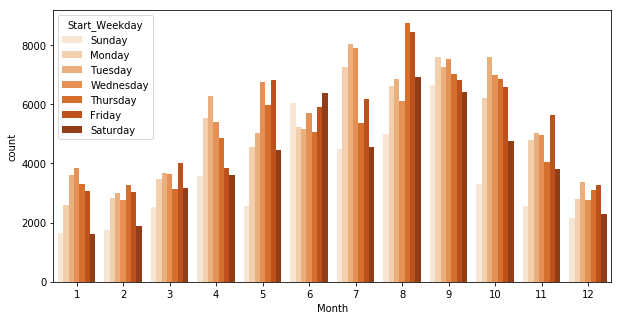

In [20]:
plt.figure(figsize = [10, 5])
sb.countplot(data = bikes_NY, x = 'Start_Month', hue = 'Start_Weekday', palette = 'Oranges')
plt.xlabel('Month');

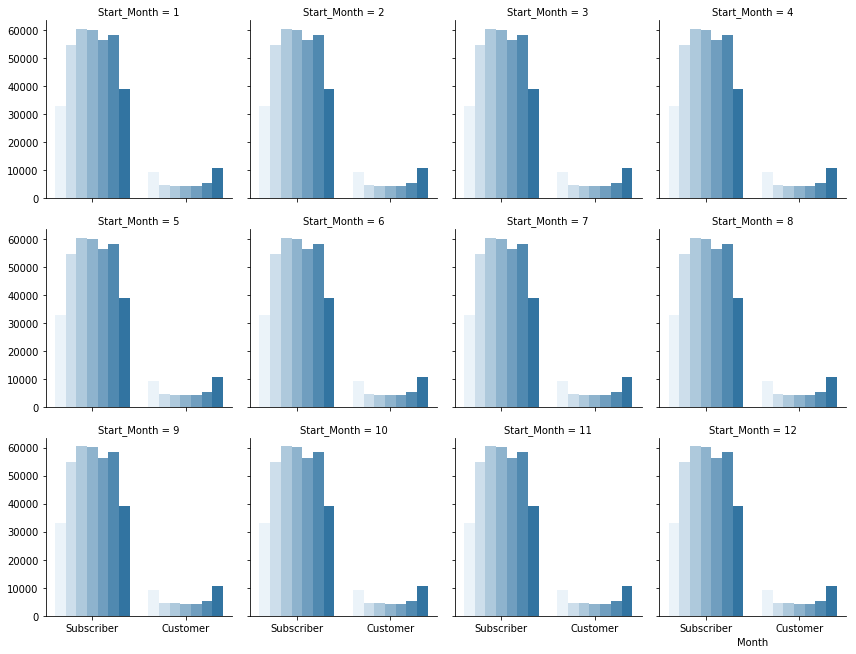

In [21]:
g = sb.FacetGrid(data=bikes_NY, col='Start_Month', col_wrap = 4)  #, size = 4, aspect = 1.5
g.map(sb.countplot, data = bikes_NY, x = 'User_Type', hue = 'Start_Weekday')
plt.xlabel('Month');

## (6) Frequency of use by user type for each day / month

> The graph shows the number of times the bicycle was used for each day of the month. The monthly analysis of the days of the most used bicycles is as follows:
January: Wednesday, February: Thursday, March: Friday, April: Tuesday, May: Wednesday / Friday, June: Saturday, July: Tuesday / Wednesday, August: Friday / Saturday, September: Monday / Wednesday, October: Tuesday, November: Friday, December: Tuesday

> The analysis shows that there is no particular relationship between specific days of week and frequency of use. The most significant result in this graph, as mentioned earlier, is the highest rate of bicycle use between May and October.
>  the number of times the bicycles were used for each day of each month was analyzed by user type. The results showed the same trend, so there was no big difference by user type.

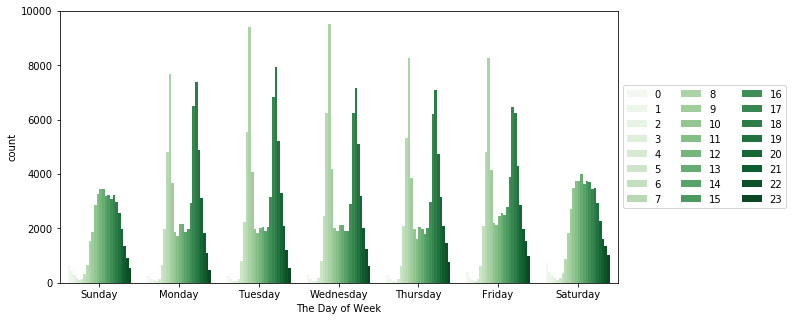

In [22]:
plt.figure(figsize = [10, 5])
g = sb.countplot(data = bikes_NY, x = 'Start_Weekday', hue = 'Start_Hour', palette = 'Greens')
g.legend(ncol = 3, loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('The Day of Week');

## (7) Frequency distribution by time of day

> By Weekdays, bicycle usage is high in the morning and afternoon hours, and bimodal is drawn. On the other hand, there is little morning usage on weekends and high afternoon usage.